In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [111]:
data=pd.read_csv('Train.csv')

In [112]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [113]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [114]:
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)

In [115]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [116]:
data['Outlet_Size'].fillna('Medium',inplace=True)

In [117]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

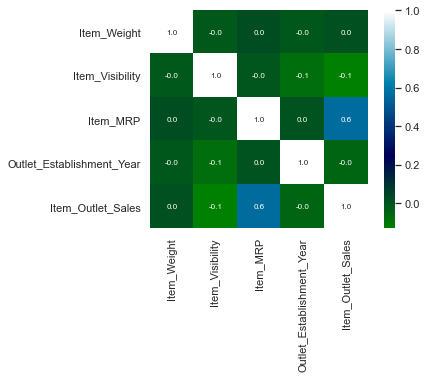

In [118]:
correlation=data.corr()
plt.figure()
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='ocean')

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


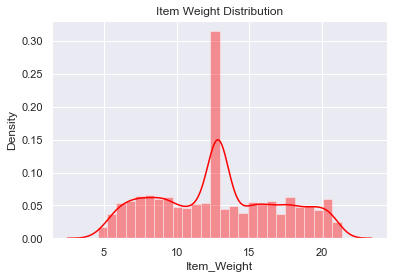

In [119]:
sns.set()
plt.figure()
sns.distplot(data.Item_Weight,color='red')
plt.title('Item Weight Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


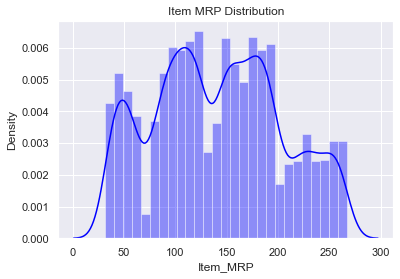

In [120]:
plt.figure()
sns.distplot(data.Item_MRP,color='blue')
plt.title('Item MRP Distribution')
plt.show()

D:\AnacondaCompiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


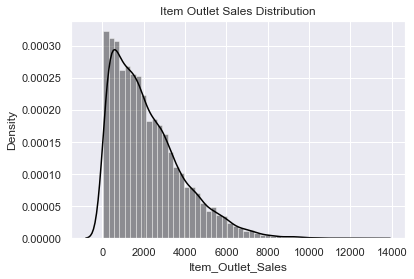

In [121]:
plt.figure()
sns.distplot(data.Item_Outlet_Sales,color='black')
plt.title('Item Outlet Sales Distribution')
plt.show()

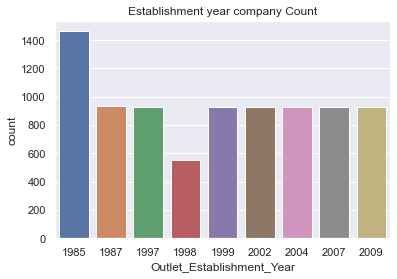

In [122]:
plt.figure()
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.title('Establishment year company Count')
plt.show()

In [123]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


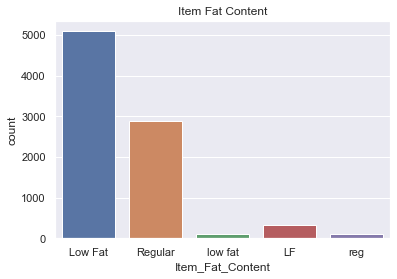

In [124]:
plt.figure()
sns.countplot(x='Item_Fat_Content',data=data)
plt.title('Item Fat Content')
plt.show()

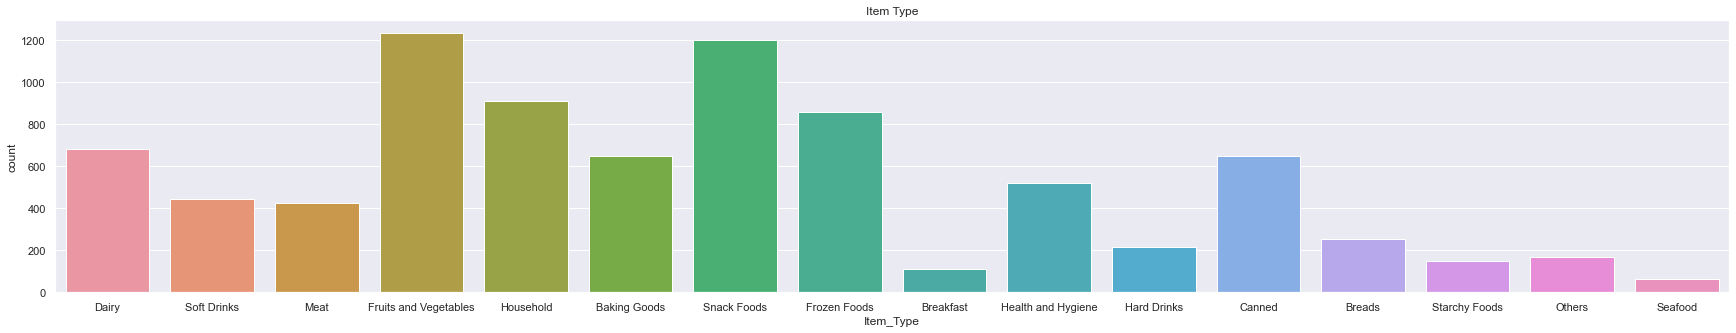

In [125]:
plt.figure(figsize=(30,5))
sns.countplot(x='Item_Type',data=data)
plt.title('Item Type')
plt.show()

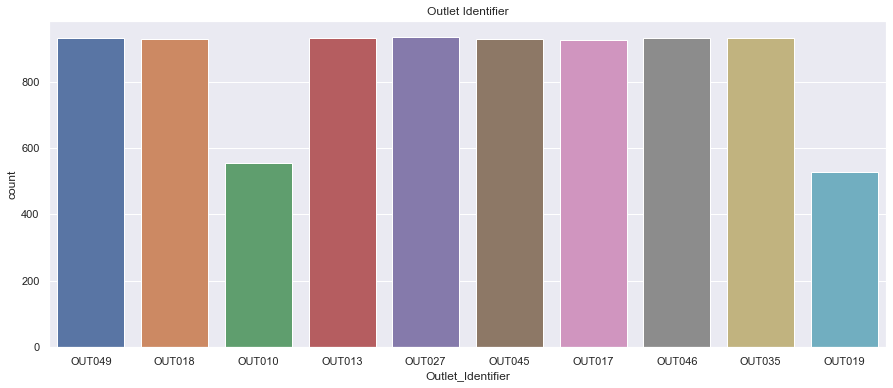

In [126]:
plt.figure(figsize=(15,6))
sns.countplot(x='Outlet_Identifier',data=data)
plt.title('Outlet Identifier')
plt.show()

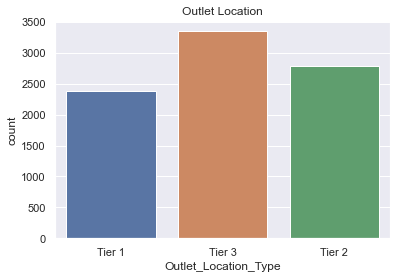

In [127]:
plt.figure()
sns.countplot(x='Outlet_Location_Type',data=data)
plt.title('Outlet Location')
plt.show()

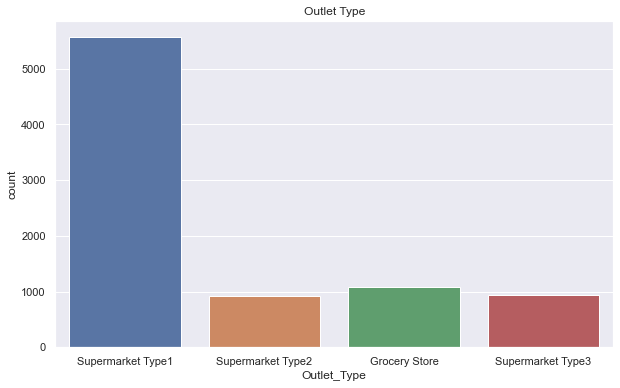

In [128]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type',data=data)
plt.title('Outlet Type')
plt.show()

In [129]:
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [130]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [131]:
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [132]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [133]:
encoder=LabelEncoder()

In [134]:
data['Item_Identifier']=encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']=encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']=encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Location_Type']=encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=encoder.fit_transform(data['Outlet_Type'])

In [135]:
data['Outlet_Size']=encoder.fit_transform(data['Outlet_Size'])

In [136]:
X=data.drop(['Item_Outlet_Sales'],axis=1)
Y=data['Item_Outlet_Sales']

In [140]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [141]:
model=XGBRegressor()

In [142]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
predictedTrain=model.predict(X_train)

error1=metrics.mean_absolute_error(Y_train,predictedTrain)
error2=metrics.r2_score(Y_train,predictedTrain)

print("Mean absolute error: ",error1)
print("R square error: ",error2)

Mean absolute error:  464.38981288805894
R square error:  0.8549833167058186


In [144]:
predictedTest=model.predict(X_test)

error3=metrics.mean_absolute_error(Y_test,predictedTest)
error4=metrics.r2_score(Y_test,predictedTest)

print("Mean absolute error: ",error3)
print("R square error: ",error4)

Mean absolute error:  856.8716943000217
R square error:  0.5191234777241828


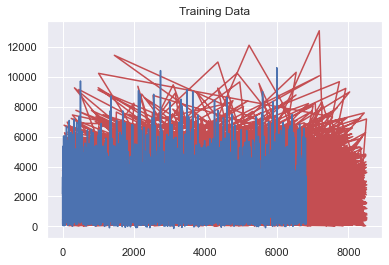

In [145]:
plt.plot(Y_train,color='r',label='Actual Price')
plt.plot(predictedTrain,color='b',label='Predicted Price')
plt.title('Training Data')
plt.show()

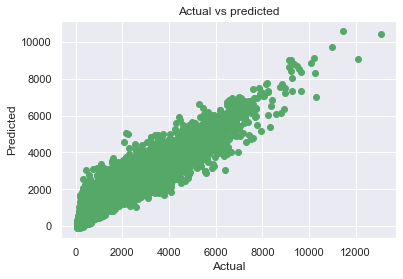

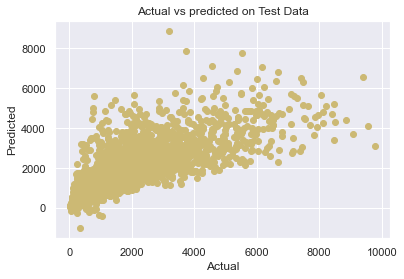

In [146]:
plt.scatter(Y_train,predictedTrain,color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
plt.show()

plt.scatter(Y_test,predictedTest,color='y')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted on Test Data')
plt.show()